In [12]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SpatialDropout1D,Flatten
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [2]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "\[2] Text Preprocessing" + "\_finalProcessed.csv"
print(path)

H:\Projects\NLP\Articles Classifer\[2] Text Preprocessing\_finalProcessed.csv


In [3]:
data = pd.read_csv(path).drop(columns=['Unnamed: 0'])
data.head()

,finalText,Category
0,work picasso other stolen spain picasso art st...,Art
1,salwa mage art corner galleri exhibit paint sa...,Art
2,tribut abdalla gohar 1 decemb khan al maghrabi...,Art
3,raw untam compel ‘ flesh ’ samir fouad crude g...,Art
4,water mosaic gezira centr modern art exhibit m...,Art


In [4]:
epochs = 10
emb_dim = 100
batch_size = 256
n_most_common_words = 80000
max_len = 250

In [5]:
tokenizer = Tokenizer(num_words=n_most_common_words,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' ,lower=True)
tokenizer.fit_on_texts(data['finalText'].values)
wordIndex = tokenizer.word_index
print(f'Number of Unique tokens is {len(wordIndex)}')

Number of Unique tokens is 23774


In [6]:
X = tokenizer.texts_to_sequences(data['finalText'].values)
X = pad_sequences(X,maxlen=max_len)
print(f'The shape of data tensor is {X.shape}')

The shape of data tensor is (30437, 250)


In [7]:
Y = pd.get_dummies(data['Category']).values
print(f'The shape of label tensor is {Y.shape}')

The shape of label tensor is (30437, 3)


In [8]:
X_train , X_test , y_train ,y_test = train_test_split(X,Y,test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27393, 250), (3044, 250), (27393, 3), (3044, 3))

In [9]:
model = Sequential([
    Embedding(n_most_common_words+1 ,emb_dim , input_length=X.shape[1]),
    SpatialDropout1D(0.4),
    LSTM(100,dropout=0.2,recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          8000100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 8,080,803
Trainable params: 8,080,803
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=128)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
215/215 [==============================] - ETA: 0s - loss: 0.2708 - accuracy: 0.8911WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E30268EEE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

In [13]:
historyFrame = pd.DataFrame(history.history)
historyFrame['epochs'] = history.epoch
historyFrame

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.270802,0.891067,0.041965,0.990145,0
1,0.025901,0.992991,0.025080,0.993101,1
2,0.009163,0.997664,0.029329,0.990473,2


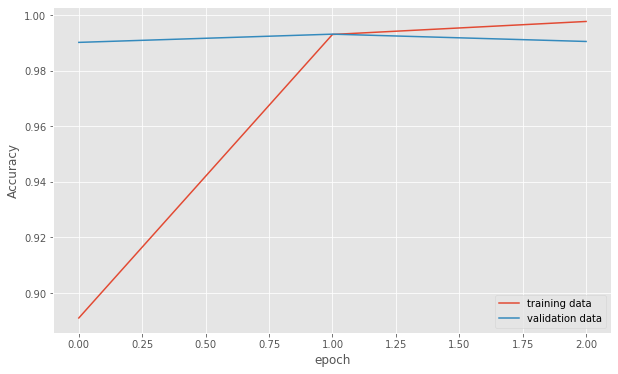

In [15]:
plt.figure(figsize=(10,6))
plt.plot(historyFrame['accuracy'])
plt.plot(historyFrame['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

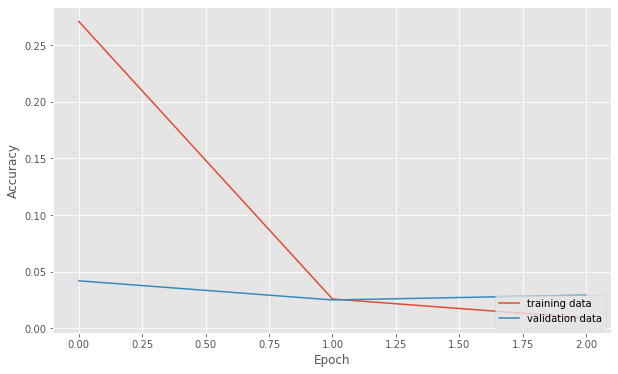

In [16]:
plt.figure(figsize=(10,6))
plt.plot(historyFrame['loss'])
plt.plot(historyFrame['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

In [17]:
evaluate = model.evaluate(X_test,y_test)

96/96 [==============================] - 3s 34ms/step - loss: 0.0293 - accuracy: 0.9905


In [18]:
print(f'Test Set Loss is {evaluate[0]} and Accuracy is {evaluate[1]}')

Test Set Loss is 0.029328640550374985 and Accuracy is 0.9904730319976807


In [32]:
testSample=[" Football in Russia is crashing and isolation can only hasten its declineJonathan WilsonRussia’s pariah status spells disaster for its clubs and national team"]
seq = tokenizer.texts_to_sequences(testSample)
pad = pad_sequences(seq,maxlen=max_len)
predict = model.predict(pad)
labels = data.Category.unique()
print(predict, labels[np.argmax(predict)])

1/1 [==============================] - 0s 27ms/step
[[0.08346627 0.40251634 0.51401734]] sports


In [33]:
model.save('model.h5')

In [34]:
labels

array(['Art', 'economy', 'sports'], dtype=object)